In [1]:
from portfolio.holdings import Portfolio

p = Portfolio()
df = p.holdings


[*********************100%***********************]  42 of 42 completed

2 Failed downloads:
- SRS.AX: No data found, symbol may be delisted
- IBXO.AX: No data found for this date range, symbol may be delisted
Checking IBXO- IBXO.AX: 1d data not available for startTime=-2208988800 and endTime=1585530092. Only 100 years worth of day granularity data are allowed to be fetched per request.
Something went wrong!
Checking SRS- SRS.AX: No data found, symbol may be delisted
Something went wrong!
Checking ZNO
Portfolio successfully built


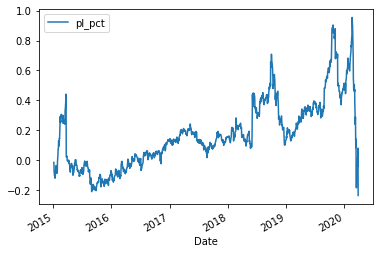

In [2]:
plt_df = p.plot(view='pl_pct')